# Exercice 7 - Geometric transformations and landmark based registration

In [30]:
from skimage import io
import matplotlib.pyplot as plt
import math
import numpy as np
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage.transform import matrix_transform
from skimage.util import img_as_float

## Geometric transformations on images
The first topic is how to apply geometric transformations on images.
Let us start by defining a utility function, that can show two images side-by-side:

In [2]:
def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,4), sharex=True, sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

### Image rotation
One of the most useful and simple geometric transformation is rotation, where an image is rotated arounf a point.

We start by some experiments on the image called NusaPenida.png. It can be found in the exercise material.

#### Exercise 1
Read the NusaPenida.png image and call it im_org. It can be rotated by:

In [3]:
in_dir = 'data/'
im_name = "NusaPenida.png"
im_org = io.imread(in_dir+im_name)

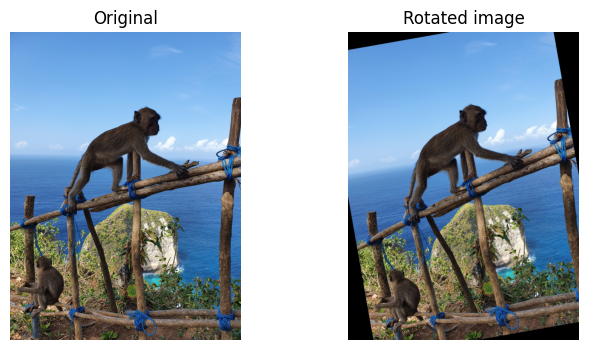

In [4]:
# angle in degrees - counter clockwise
rotation_angle = 10
rotated_img = rotate(im_org, rotation_angle)
show_comparison(im_org, rotated_img, "Rotated image")

Notice, that in this function, the angle should be given in degrees.

By default, the image is rotated around the center of the image. This can be changed by manually specifying the point that the image should be rotated arounde (here:(0,0)):

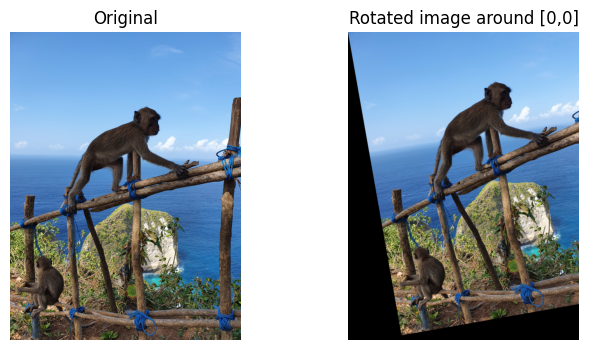

In [5]:
rot_center = [0,0]
rotated_img = rotate(im_org, rotation_angle, center=rot_center)
show_comparison(im_org, rotated_img, "Rotated image around [0,0]")

#### Exercise 2
Experiment whit different center points and notice the results. 

As seen, there are areas of the rotated image that is filled with a background value. It can be controlled how this background filling shall behave. 

Here the background filling mode is set to reflect

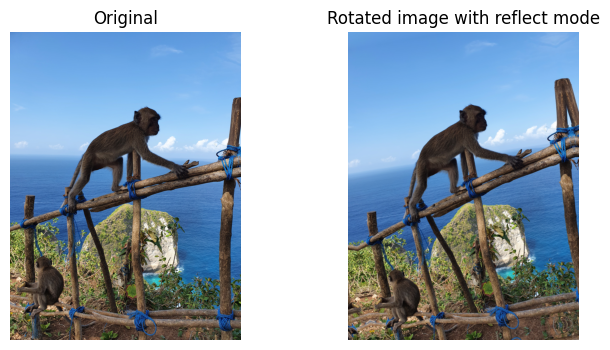

In [6]:
rotated_img_refl = rotate(im_org, rotation_angle, mode="reflect")
show_comparison(im_org, rotated_img_refl, "Rotated image with reflect mode")

### Exercise 3
Try the rotation with background filling mode reflect an wrap and notice the results and differences.

It is also possible to define a constant fill value. Currently, sci-kit image only supporst a single value (not RGB).

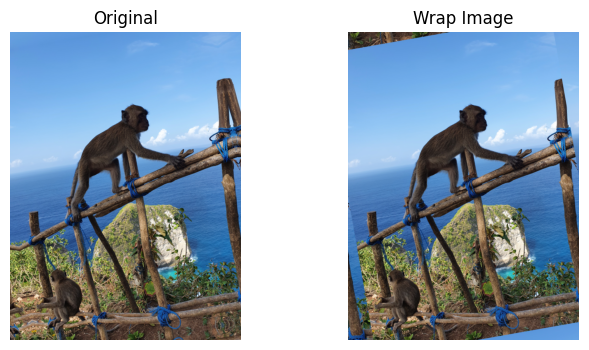

In [7]:
rotated_img_wrap = rotate(im_org, rotation_angle, mode="wrap")
show_comparison(rotated_img_refl, rotated_img_wrap, 'Wrap Image')

### Exercise 4
Try to use:

In [8]:
rotated_img = rotate(im_org, rotation_angle, resize = True, mode="constant", cval = 1)

with different values of cval and notices the outcomes.

By default, the rotated output image has the same size as the input image and therefore some parts of the rotated image are cropped away. It is possible to automatically adjust the output size, so the rotated image fits into the resized image.

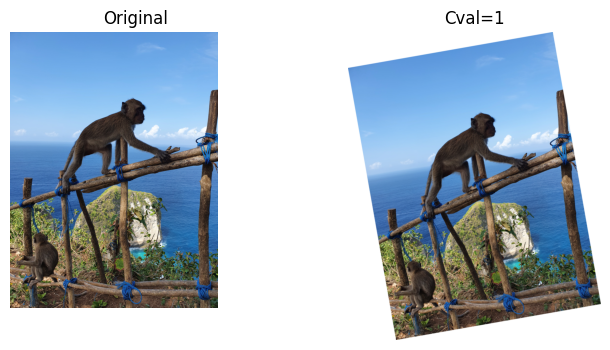

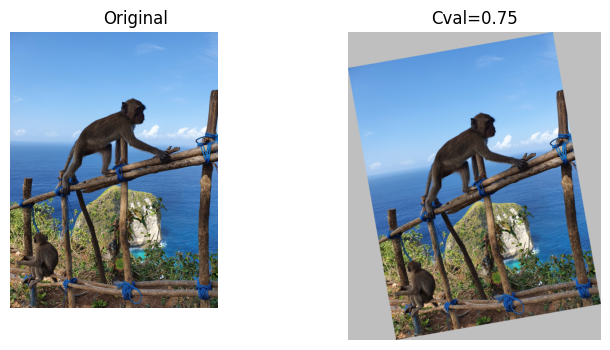

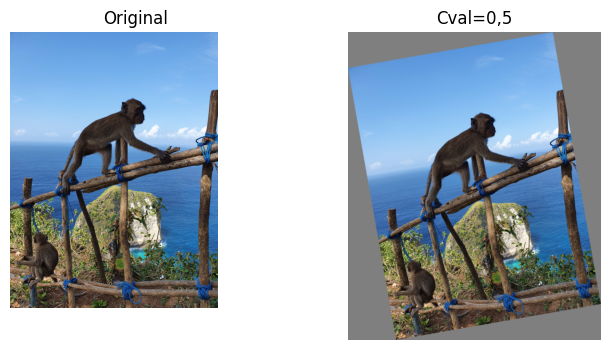

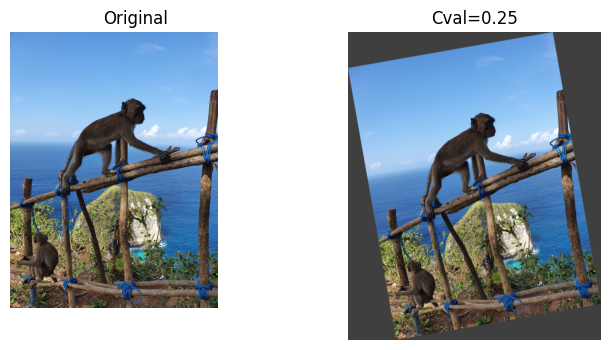

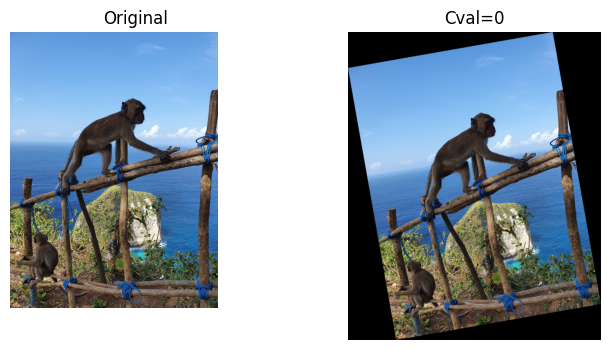

In [9]:
rotated_img = rotate(im_org, rotation_angle, resize = True, mode="constant", cval = 1)
show_comparison(im_org, rotated_img, 'Cval=1')

rotated_img = rotate(im_org, rotation_angle, resize = True, mode="constant", cval = 0.75)
show_comparison(im_org, rotated_img, 'Cval=0.75')

rotated_img = rotate(im_org, rotation_angle, resize = True, mode="constant", cval = 0.5)
show_comparison(im_org, rotated_img, 'Cval=0,5')

rotated_img = rotate(im_org, rotation_angle, resize = True, mode="constant", cval = 0.25)
show_comparison(im_org, rotated_img, 'Cval=0.25')

rotated_img = rotate(im_org, rotation_angle, resize = True, mode="constant", cval = 0)
show_comparison(im_org, rotated_img, 'Cval=0')

### Exercise 5
Test the use of automatic resizing:

In [10]:
rotated_img = rotate(im_org, rotation_angle, resize=True)

also combine resizing with different background filling modes.

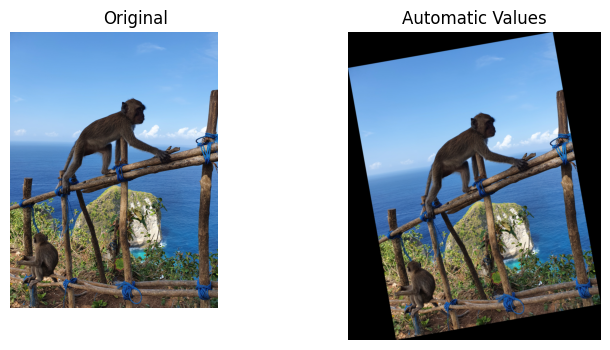

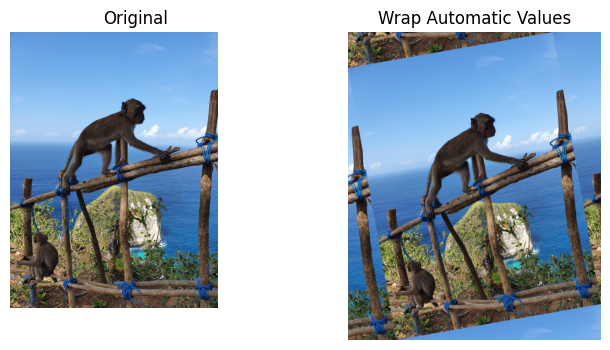

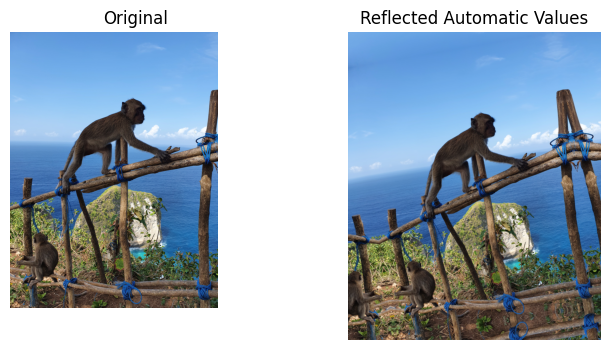

In [11]:
rotated_img = rotate(im_org, rotation_angle, resize=True)
show_comparison(im_org, rotated_img, 'Automatic Values')

rotated_img = rotate(im_org, rotation_angle, resize=True, mode='wrap')
show_comparison(im_org, rotated_img, 'Wrap Automatic Values')

rotated_img = rotate(im_org, rotation_angle, resize=True, mode='reflect')
show_comparison(im_org, rotated_img, 'Reflected Automatic Values')

## Euclidean image transformation

An alternative way of doing geometric image transformations is to first construct the transformation and then apply it to the image. We will start by the __Euclidean__ image transformation that consists of a rotation and a translation. It is also called a rigid body transformation.

### Exercise 6
Start by definig the transformation:

In [12]:
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi /180.
trans = [10,20]
tform = EuclideanTransform(rotation=rotation_angle, translation= trans)
print(tform.params)

[[ 0.98480775 -0.17364818 10.        ]
 [ 0.17364818  0.98480775 20.        ]
 [ 0.          0.          1.        ]]


it can be seen in the print statement that the transformation consists of a 3x3 matrix. The matrix is used to transform points using __homogenous coordinates__. Notice that the angle is defined in radians in this function. 

### Exercise 7
The computed transform can be applied to an image using the warp function:

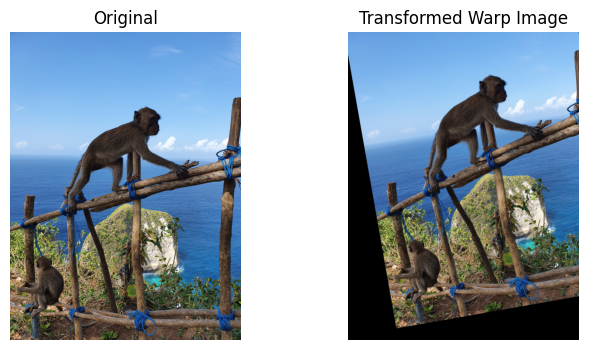

In [13]:
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, 'Transformed Warp Image')


__Note:__ The warp function actually does an inverse transformation of the image, since it uses the transform to find the pixels values in the input image that should be placed in the output image.

## Inverse transformation

It is posible to get the inverse of a computed transform by using tform.inverse . An image can then be transformed using the invers transform by: 

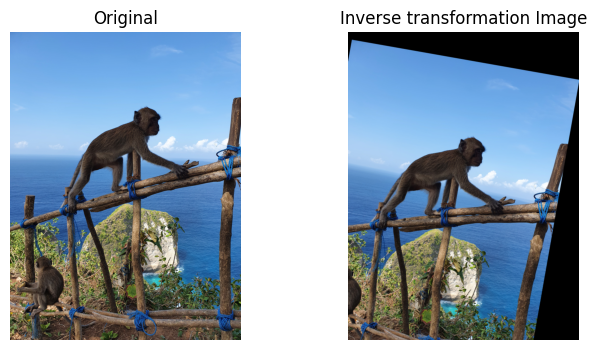

In [14]:
transformed_img = warp(im_org, tform.inverse)
show_comparison(im_org, transformed_img, 'Inverse transformation Image') 

### Exercise 8 
Construct a Euclidean transformation with only rotation. Test the transformation and the invers transformation and notice the effect.

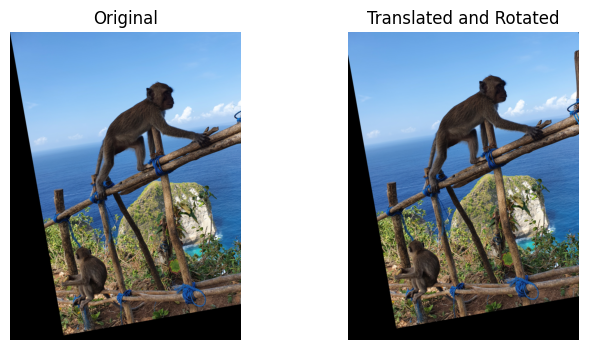

In [15]:
angle = 10.0
trans = [10,20]
rotation_angle = angle*math.pi/180.0

tform_rotation = EuclideanTransform(rotation=rotation_angle)
tform_rotation_translation = EuclideanTransform(rotation=rotation_angle, translation=trans)

rotated_image = warp(im_org, tform_rotation)
translated_image = warp(im_org, tform_rotation_translation)

show_comparison(rotated_image, translated_image, 'Translated and Rotated')

## Similarity transform of image
The SimilarityTransform computes a transform is a non-linear transform that can create interestig visual results on images.

### Exercise 10
Try the swirl transformation:

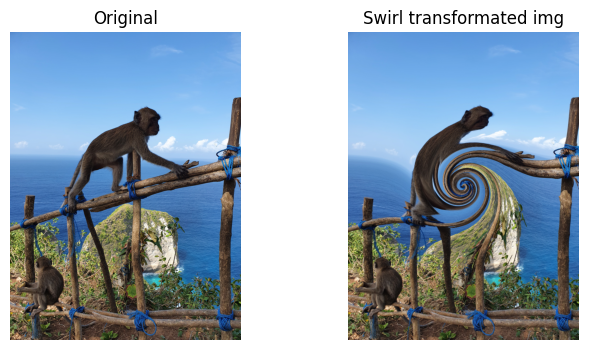

In [16]:
str = 10
rad = 300
swirl_img = swirl(im_org, strength=str, radius=rad)
show_comparison(im_org, swirl_img, 'Swirl transformated img')

It is also possible to change the center os the swirl:

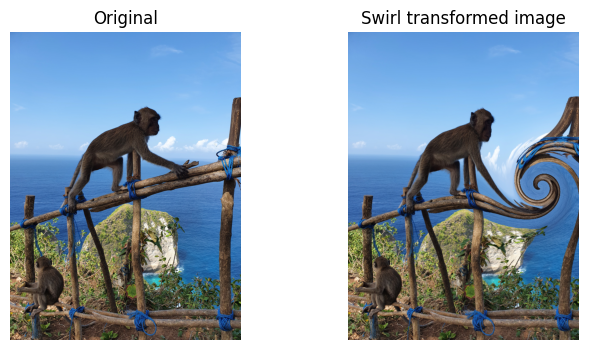

In [17]:
str = 10
rad = 300
c = [500, 400]
swirl_img = swirl(im_org, strength=str, radius=rad, center=c)
show_comparison(im_org, swirl_img, 'Swirl transformed image')

## Landmark based registration
The goal of landmark based registration is to align two images using a set of landmarks placed in both images. The landmarks need to have correspondence meaning that the landmarks should be placed on the same anatomical spot in the two images.

There are two photos of hands: __Hand1.jpg__ and __Hand2.jpg__ and the goal is to transform __Hand1__ so it fits on top of __Hand2__. In this exercise we call Hand1 one for the source (src) and Hand2 for the destination (dst).

### Exercise 11

Start by reading the two images into src_img and dst_img. Visualize their overlap by:


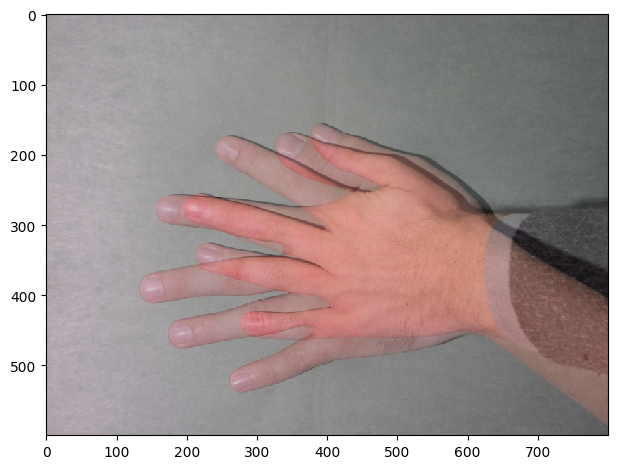

In [18]:
src_name = "Hand1.jpg"
dst_name = "Hand2.jpg"
src_img = io.imread(in_dir+src_name)
dst_img = io.imread(in_dir+dst_name)


blend = 0.5*img_as_float(src_img) + 0.5*img_as_float(dst_img)
io.imshow(blend)
io.show()

## Manual Landmark Notation

We will manually placed landmarks on the two images to align the them.


### Exercise 12

We have manually placed a set of landmarks on the source image. They can be visualized by:

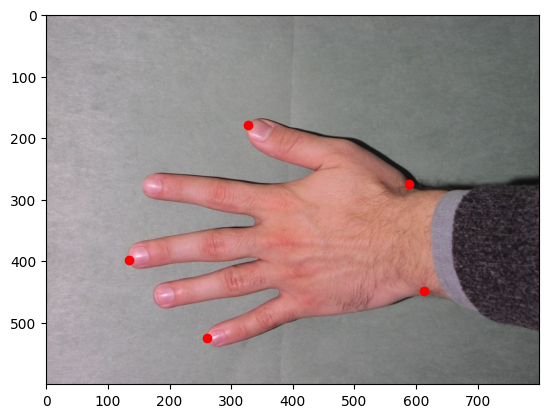

In [22]:
src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(src_img)
plt.plot(src[:,0], src[:,1], '.r', markersize=12)
plt.show()

### Exercise 13

You should now place the same landmarks on the destination image. In imshow you can see the pixel coordinates og the coursor.

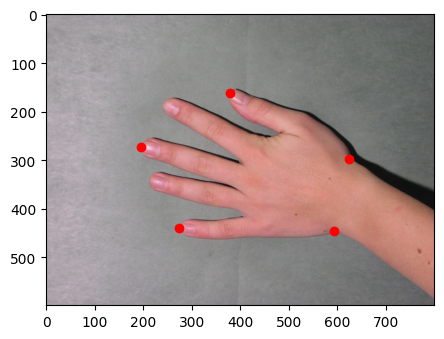

In [25]:
dst = np.array([[624, 298], [379, 162], [195, 274], [274, 440], [594, 446]])

plt.imshow(dst_img)
plt.plot(dst[:,0], dst[:,1], '.r', markersize=12)
plt.show()

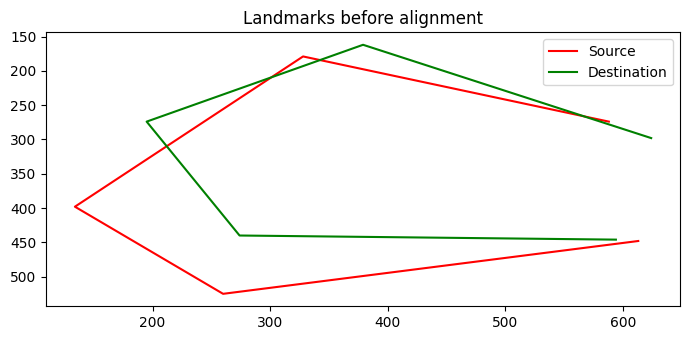

In [26]:
fig, ax = plt.subplots()
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

To calculate how well two sets of landmarks are aligned, we can compute the objective function:

$F = \sum_{i=1}^{N}\left | a_{i}-b{i} \right |^{2},$

here $a_{i}$ are the landmarks in the destination image and $b_{i}$ are the landmarks in the source image.

### Exercise 14
Compute $F$ from your landmarks. It can for example be done like:

In [27]:
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 31645


The optimal Euclidean transformation that brings the source landmarks over in the destination landmarks can be found by:

In [28]:
tform = EuclideanTransform()
tform.estimate(src, dst)

True

The found transform can be applied to the source points by:

In [31]:
src_transform = matrix_transform(src, tform.params)

### Exercise 15
Visualize the transformed source landmarks together with the destination landmarks. Also compute the objective function F using the transformed points. What do you observe?

In [37]:
e_x = src_transform[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src_transform[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 4497.289752926069


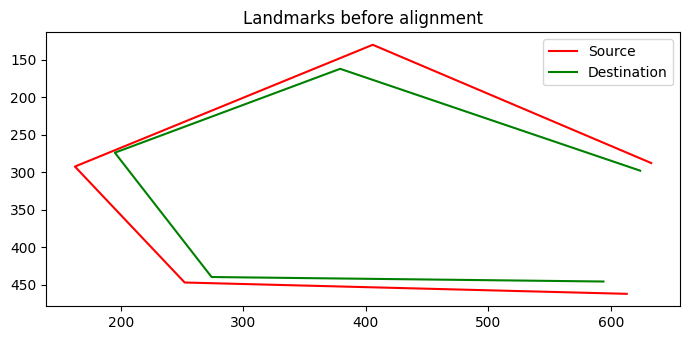

In [38]:
fig, ax = plt.subplots()
ax.plot(src_transform[:, 0], src_transform[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

### Exirce 16

We can now apply the transformartion to the source image. Notice that we use the inverse transform due to the inverse mapping in the image resampling:

In [40]:
transformed_src_img = warp(src_img, tform.inverse)

Show the warped image and also try to blend the warped image destination image like in exercise 11. What do you obseve_

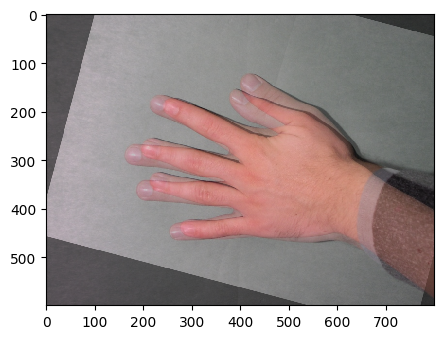

In [39]:
blend = 0.5*img_as_float(transformed_src_img) + 0.5*img_as_float(dst_img)
io.imshow(blend)
io.show()

## Video transformartions

Now try yo make a small program, that acquires video from yout webcam/telephone, transforms it and shows the output. In the exercise material there is a program that can be modified.

By default, the program acquires a colour image and rotates it. There is a counter that is increased every frame and that counter can be used to modify the transformation (for example the rotation angle). The program also measures how many miliseconds the image processing takes.

### Exercise 17

Run the example program and notice how the output image rotates.

In [ ]:
import time
import cv2
from skimage.transform import swirl
from skimage.transform import rotate
import math


def show_in_moved_window(win_name, img, x, y):
    """
    Show an image in a window, where the position of the window can be given
    """
    cv2.namedWindow(win_name)
    #cv2.moveWindow(win_name, x, y)
    cv2.imshow(win_name, img)


def process_rgb_image(img, counter):
    """
    Simple processing of a color (RGB) image
    """
    return rotate(img, counter)


def capture_from_camera_and_show_images():
    print("Starting image capture")

    print("Opening connection to camera")
    url = 0
    use_droid_cam = False
    if use_droid_cam:
        url = "http://192.168.1.120:4747/video"
    cap = cv2.VideoCapture(url)
    if not cap.isOpened():
        print("Cannot open camera")
        exit()

    print("Starting camera loop")
    # To keep track of frames per second using a high-performance counter
    old_time = time.perf_counter()
    fps = 0
    stop = False
    counter = 0
    while not stop:
        ret, new_frame = cap.read()
        if not ret:
            print("Can't receive frame. Exiting ...")
            break

        # Change from OpenCV BGR to scikit image RGB
        new_image = new_frame[:, :, ::-1]
        proc_time_start = time.perf_counter()
        proc_img = process_rgb_image(new_image, counter)
        proc_time = time.perf_counter() - proc_time_start
        # convert back to OpenCV BGR to show it
        proc_img = proc_img[:, :, ::-1]

        counter = counter + 1

        # update FPS - but do it slowly to avoid fast changing number
        new_time = time.perf_counter()
        time_dif = new_time - old_time
        old_time = new_time
        fps = fps * 0.95 + 0.05 * 1 / time_dif

        # Put the FPS on the new_frame
        str_out = f"fps: {int(fps)} proc.time: {int(proc_time * 1000)} ms"
        font = cv2.FONT_HERSHEY_COMPLEX
        cv2.putText(new_frame, str_out, (100, 100), font, 1, 255, 1)

        # Display the resulting frame
        show_in_moved_window('Input', new_frame, 0, 10)
        show_in_moved_window('Processed image', proc_img, 1200, 10)

        if cv2.waitKey(1) == ord('q'):
            stop = True

    print("Stopping image loop")
    cap.release()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    capture_from_camera_and_show_images()


### Exercise 18 

Modify the program so it performs the swirl transform on the image. The parameters of the swirl transform can be changed using the counter. For example:

$str = math.sin(counter/10)*10$

Try this and also try to change the other transform parameters using the counter.

In [42]:
import time
import cv2
from skimage.transform import swirl
from skimage.transform import rotate
import math


def show_in_moved_window(win_name, img, x, y):
    """
    Show an image in a window, where the position of the window can be given
    """
    cv2.namedWindow(win_name)
    #cv2.moveWindow(win_name, x, y)
    cv2.imshow(win_name, img)


def process_rgb_image(img, counter):
    """
    Simple processing of a color (RGB) image
    """
    str = str = math.sin(counter/10)*10
    rad = 300
    img = swirl(img, strength=str, radius=rad)
    return rotate(img, counter)


def capture_from_camera_and_show_images():
    print("Starting image capture")

    print("Opening connection to camera")
    url = 0
    use_droid_cam = False
    if use_droid_cam:
        url = "http://192.168.1.120:4747/video"
    cap = cv2.VideoCapture(url)
    if not cap.isOpened():
        print("Cannot open camera")
        exit()

    print("Starting camera loop")
    # To keep track of frames per second using a high-performance counter
    old_time = time.perf_counter()
    fps = 0
    stop = False
    counter = 0
    while not stop:
        ret, new_frame = cap.read()
        if not ret:
            print("Can't receive frame. Exiting ...")
            break

        # Change from OpenCV BGR to scikit image RGB
        new_image = new_frame[:, :, ::-1]
        proc_time_start = time.perf_counter()
        proc_img = process_rgb_image(new_image, counter)
        proc_time = time.perf_counter() - proc_time_start
        # convert back to OpenCV BGR to show it
        proc_img = proc_img[:, :, ::-1]

        counter = counter + 1

        # update FPS - but do it slowly to avoid fast changing number
        new_time = time.perf_counter()
        time_dif = new_time - old_time
        old_time = new_time
        fps = fps * 0.95 + 0.05 * 1 / time_dif

        # Put the FPS on the new_frame
        str_out = f"fps: {int(fps)} proc.time: {int(proc_time * 1000)} ms"
        font = cv2.FONT_HERSHEY_COMPLEX
        cv2.putText(new_frame, str_out, (100, 100), font, 1, 255, 1)

        # Display the resulting frame
        show_in_moved_window('Input', new_frame, 0, 10)
        show_in_moved_window('Processed image', proc_img, 1200, 10)

        if cv2.waitKey(1) == ord('q'):
            stop = True

    print("Stopping image loop")
    cap.release()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    capture_from_camera_and_show_images()


Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop
